<a href="https://colab.research.google.com/github/sadnyd/ClothMatcherDemo/blob/main/cl_match_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install scikit-optimize

import numpy as np
import pandas as pd
df=pd.read_csv('final_results_shuffled.csv')
cols_to_drop=['tw_id','bw_id','tw_productDisplayName','bw_productDisplayName','tw_masterCategory','bw_masterCategory','tw_subCategory','bw_subCategory']
df=df.drop(columns=cols_to_drop).rename(columns={'rate':'result'})

In [37]:
df.head()

,tw_gender,tw_articleType,tw_baseColour,season,tw_year,tw_usage,bw_gender,bw_articleType,bw_baseColour,season.1,bw_year,bw_usage,result
0,Men,Shirts,Yellow,Fall,2011,Casual,Girls,Capris,Olive,Summer,2012,Casual,3.0
1,Women,Tshirts,Pink,Summer,2011,Casual,Women,Shorts,Red,Summer,2012,Casual,7.5
2,Men,Tshirts,Black,Summer,2011,Casual,Men,Trousers,Beige,Summer,2012,Casual,8.5
3,Men,Shirts,Red,Fall,2011,Formal,Men,Trousers,Grey,Summer,2012,Formal,8.5
4,Men,Shirts,Brown,Summer,2012,Casual,Men,Trousers,Grey,Summer,2012,Formal,7.5


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tw_gender       100 non-null    object 
 1   tw_articleType  100 non-null    object 
 2   tw_baseColour   100 non-null    object 
 3   season          100 non-null    object 
 4   tw_year         100 non-null    int64  
 5   tw_usage        100 non-null    object 
 6   bw_gender       100 non-null    object 
 7   bw_articleType  100 non-null    object 
 8   bw_baseColour   100 non-null    object 
 9   season.1        100 non-null    object 
 10  bw_year         100 non-null    int64  
 11  bw_usage        100 non-null    object 
 12  result          100 non-null    float64
dtypes: float64(1), int64(2), object(10)
memory usage: 10.3+ KB


In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['season'] = label_encoder.fit_transform(df['season'])
df['season.1'] = label_encoder.fit_transform(df['season.1'])


In [40]:
df.head()

,tw_gender,tw_articleType,tw_baseColour,season,tw_year,tw_usage,bw_gender,bw_articleType,bw_baseColour,season.1,bw_year,bw_usage,result
0,Men,Shirts,Yellow,0,2011,Casual,Girls,Capris,Olive,1,2012,Casual,3.0
1,Women,Tshirts,Pink,1,2011,Casual,Women,Shorts,Red,1,2012,Casual,7.5
2,Men,Tshirts,Black,1,2011,Casual,Men,Trousers,Beige,1,2012,Casual,8.5
3,Men,Shirts,Red,0,2011,Formal,Men,Trousers,Grey,1,2012,Formal,8.5
4,Men,Shirts,Brown,1,2012,Casual,Men,Trousers,Grey,1,2012,Formal,7.5


In [41]:
df = pd.get_dummies(df, columns=['tw_gender', 'bw_gender','tw_articleType','bw_articleType','tw_baseColour','bw_baseColour','tw_usage','bw_usage'])


In [42]:
df.head()

,season,tw_year,season.1,bw_year,result,tw_gender_Men,tw_gender_Women,bw_gender_Girls,bw_gender_Men,bw_gender_Women,...,bw_baseColour_Navy Blue,bw_baseColour_Olive,bw_baseColour_Pink,bw_baseColour_Red,tw_usage_Casual,tw_usage_Ethnic,tw_usage_Formal,bw_usage_Casual,bw_usage_Formal,bw_usage_Sports
0,0,2011,1,2012,3.0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,1,2011,1,2012,7.5,0,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2,1,2011,1,2012,8.5,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0,2011,1,2012,8.5,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,1,2012,1,2012,7.5,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   season                      100 non-null    int64  
 1   tw_year                     100 non-null    int64  
 2   season.1                    100 non-null    int64  
 3   bw_year                     100 non-null    int64  
 4   result                      100 non-null    float64
 5   tw_gender_Men               100 non-null    uint8  
 6   tw_gender_Women             100 non-null    uint8  
 7   bw_gender_Girls             100 non-null    uint8  
 8   bw_gender_Men               100 non-null    uint8  
 9   bw_gender_Women             100 non-null    uint8  
 10  tw_articleType_Shirts       100 non-null    uint8  
 11  tw_articleType_Tshirts      100 non-null    uint8  
 12  bw_articleType_Capris       100 non-null    uint8  
 13  bw_articleType_Jeans        100 non-

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['season','season.1','tw_gender', 'bw_gender','tw_articleType','bw_articleType','tw_baseColour','bw_baseColour','tw_usage','bw_usage']

df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)


In [45]:
df.head()

,season,tw_year,season.1,bw_year,result,tw_gender_Men,tw_gender_Women,bw_gender_Girls,bw_gender_Men,bw_gender_Women,...,bw_baseColour_Navy Blue,bw_baseColour_Olive,bw_baseColour_Pink,bw_baseColour_Red,tw_usage_Casual,tw_usage_Ethnic,tw_usage_Formal,bw_usage_Casual,bw_usage_Formal,bw_usage_Sports
0,0.0,0.0,0.5,0.5,0.30,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.5,0.5,0.75,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.5,0.5,0.85,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.5,0.5,0.85,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,1.0,0.5,0.5,0.75,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [46]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='result')
y=df['result']

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2,random_state=8)

In [47]:
X_train.head()

,season,tw_year,season.1,bw_year,tw_gender_Men,tw_gender_Women,bw_gender_Girls,bw_gender_Men,bw_gender_Women,tw_articleType_Shirts,...,bw_baseColour_Navy Blue,bw_baseColour_Olive,bw_baseColour_Pink,bw_baseColour_Red,tw_usage_Casual,tw_usage_Ethnic,tw_usage_Formal,bw_usage_Casual,bw_usage_Formal,bw_usage_Sports
57,1.0,1.0,0.5,0.5,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
64,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
80,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
24,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
70,1.0,1.0,0.5,0.5,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [48]:
X_test.head()

,season,tw_year,season.1,bw_year,tw_gender_Men,tw_gender_Women,bw_gender_Girls,bw_gender_Men,bw_gender_Women,tw_articleType_Shirts,...,bw_baseColour_Navy Blue,bw_baseColour_Olive,bw_baseColour_Pink,bw_baseColour_Red,tw_usage_Casual,tw_usage_Ethnic,tw_usage_Formal,bw_usage_Casual,bw_usage_Formal,bw_usage_Sports
17,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
23,1.0,0.0,0.5,0.5,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.5,0.5,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
44,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
55,0.0,0.0,0.5,0.5,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [49]:
y_test.head()

17    0.40
23    0.15
1     0.75
44    0.15
55    0.15
Name: result, dtype: float64

Pipeline for the model

In [50]:

from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

In [51]:
estimator= [
    ('clf',XGBRegressor(random_state=45))
]
pipe=Pipeline(steps=estimator)
pipe

Pipeline(steps=[('clf',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=45, ...))])

In [52]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(pipe, search_space, cv=5, n_iter=50, scoring='neg_mean_squared_error', random_state=42)


In [56]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('clf',
                                         XGBRegressor(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constraints=N...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [57]:
best_params = opt.best_params_
best_xgb_model = XGBRegressor(**best_params, n_estimators=100)
best_xgb_model.fit(X_train, y_train)


[10:31:18] WARNING: ../src/learner.cc:767: 
Parameters: { "clf__colsample_bylevel", "clf__colsample_bynode", "clf__colsample_bytree", "clf__gamma", "clf__learning_rate", "clf__max_depth", "clf__reg_alpha", "clf__reg_lambda", "clf__subsample" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             clf__colsample_bylevel=0.5, clf__colsample_bynode=1.0,
             clf__colsample_bytree=0.5603764754351946, clf__gamma=0.0,
             clf__learning_rate=1.0, clf__max_depth=2,
             clf__reg_alpha=0.16686161576907194,
             clf__reg_lambda=9.521330541104394, clf__subsample=0.5,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, ...)

In [27]:
opt.best_estimator_

Pipeline(steps=[('clf',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=0.5331080642783614,
                              colsample_bynode=0.7262320733948379,
                              colsample_bytree=0.5362052518135637,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=7.436578137661654,
                              gpu_id=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.0011002938624638172, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=45, ...))])

In [58]:
y_pred = best_xgb_model.predict(X_test)


In [60]:
y_pred

array([ 0.64399356,  0.45714542,  0.522679  ,  0.59765047,  0.26402622,
        0.03278054,  0.83864284,  0.11030585,  0.6819711 ,  0.2068036 ,
        0.55487794,  0.342763  , -0.05018164,  0.08653376,  0.38300592,
        0.6039326 , -0.01962443,  0.8058109 ,  0.04119451,  0.68865436],
      dtype=float32)

In [62]:
y_test

17    0.40
23    0.15
1     0.75
44    0.15
55    0.15
99    0.00
86    0.90
29    0.10
62    0.75
33    0.35
98    0.35
12    0.25
11    0.00
39    0.00
3     0.85
41    0.10
97    0.00
30    0.40
72    0.00
43    0.75
Name: result, dtype: float64

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared (R2): {r2}")


MAE: 0.17945320686325433
MSE: 0.0576081625127252
RMSE: 0.24001700463243267
R-squared (R2): 0.3894206410945926


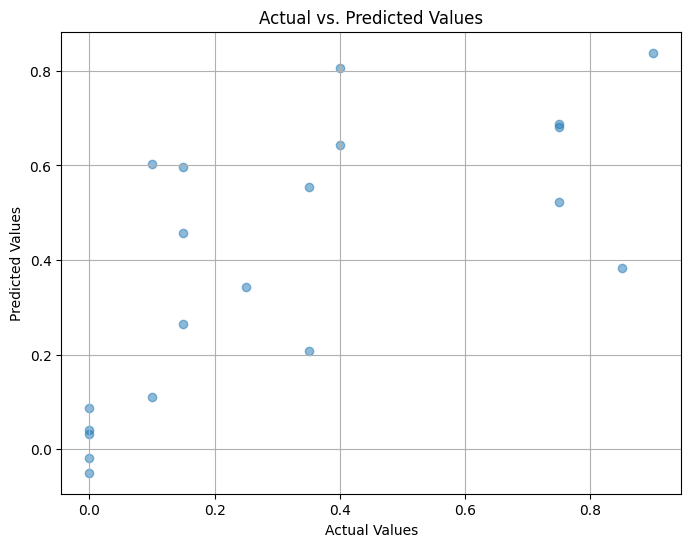

In [61]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()
